### Importando Bibliotecas

In [40]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import datetime

#
from collections import Counter
import collections


### Importando bases

In [5]:
cadastro = pd.read_excel ("cadastro - cadastro.xlsx")
combustivel = pd.read_excel ("preco da gasolina - preco da gasolina.xlsx")
profissao = pd.read_excel ("salario_profissoes - salario_profissoes.xlsx")

### Preparação da base

In [10]:
# Tratando váriveis de cadastro
cadastro = cadastro.replace(['ensino médio','ensino Médio'],'Ensino Médio').replace("ensino superior","Ensino Superior")
cadastro = cadastro.replace(['Solteira'],'Solteiro')
cadastro = cadastro.replace(['Casada'],'Casado')
cadastro = cadastro.replace(['Divorciada'],'Divorciado')
cadastro.rename(columns = {"experiencia profissional":"Exp_Profissional","tem carro":"tem_carro" }, inplace = True)


# Tratando váveiaveis de Combustivel
combustivel = combustivel.sort_values('cidade', ascending=False)
combustivel = combustivel.drop_duplicates('cidade',keep='first')

# Tratando váveiaveis de profissão
profissao.rename(columns = {"salario até 3 anos": "salarioAte3","salaior +3 anos":"salarioMaior3"}, inplace = True)

# Juntando bases (cadastro, combustivel, profissao)
Base  = pd.merge(cadastro, profissao, how = 'left', left_on = ['profissão'], right_on = ['Profissões']).merge(combustivel, how = 'inner', left_on = ['cidade'], right_on = ['cidade'])
#Base  = pd.merge(cadastro, combustivel, how = 'left', left_on = ['cidade'], right_on = ['cidade'])

# Ajustando valores de salario de quem não tem profissão
Base['salarioAte3'].fillna(0, inplace=True)
Base['salarioMaior3'].fillna(0, inplace=True)

# Deletei a coluna Profissões da tabela profissao pois vou utilizar a coluna profissão da tabela cadastro
Base = Base.drop(columns = ['Profissões'])

Base.shape


(30, 18)

<h5><p style="background-color:white; color:blue"> <b><i>Qual a idade média das pessoas no cadastro? </b> </p></h3>

In [11]:
# Acrescentado uma coluna com o ano atual apenas para calcudar a idade
Base.insert(loc=3,column="AnoAtual",value=2020)
Base.insert(loc=4,column="Idade", value = Base.AnoAtual - Base.ano_nascimento)

# Retirando a coluna que não preciso mais
Base = Base.drop(columns = ['AnoAtual'])

# Mostrando resposta
print ("A idade média das pessoas do cadastro é","%.2f"%Base.Idade.mean())

A idade média das pessoas do cadastro é 32.73


<h5><p style="background-color:white; color:blue"> <b><i>Quantos homens tem no cadastro ? </b> </p></h3>

In [12]:
print("A quantidade de homens no cadastro é" ,Base.sexo.value_counts().filter('m') )

A quantidade de homens no cadastro é m    16
Name: sexo, dtype: int64


<h5><p style="background-color:white; color:blue"> <b><i>Quantas muheres tem no cadastro ? </b> </p></h3>

In [13]:
print("A quantidade de mulheres no cadastro é" ,Base.sexo.value_counts().filter('f') )

A quantidade de mulheres no cadastro é f    14
Name: sexo, dtype: int64


<h5><p style="background-color:white; color:blue"> <b><i>Qual a idade média dos homens e das mulheres ? </b> </p></h3>

In [14]:
mediaIdadeHomens = Base.query("sexo == 'm'").Idade.mean()
print("A média da idade de homens é","%.2f"%mediaIdadeHomens)

A média da idade de homens é 31.75


In [15]:
mediaIdadeHomens = Base.query("sexo == 'f'").Idade.mean()
print("A média da idade de mulheres é","%.2f"%mediaIdadeHomens)

A média da idade de mulheres é 33.86


<h5><p style="background-color:white; color:blue"> <b><i>Crie um gráfico de barras e mostre a distribuição de escolaridade no cadastro ?</b> </p></h3>

Text(0.5, 1.0, 'Dest. Escolaridade')

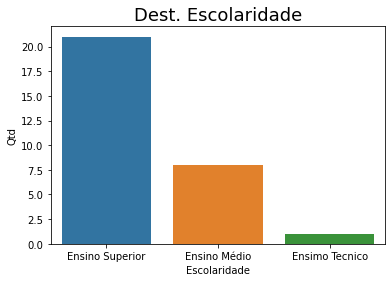

In [16]:
# Salvando dados do agrupamento da base por escolaridade em um frame
QtdEscolaridade = Base.escolaridade.value_counts().to_frame().reset_index()
QtdEscolaridade.columns = ['Escolaridade', 'Qtd']

# Utilizando o frame para criar um gráfico
fig, ax = plt.subplots()   
sns.barplot(x=QtdEscolaridade.Escolaridade, y=QtdEscolaridade['Qtd'], ax=ax, data=QtdEscolaridade)
ax.set_title("Dest. Escolaridade", fontdict={'fontsize':18})

<h5><p style="background-color:white; color:blue"> <b><i>Mostre a Média Salarial do cadastro ?</b> </p></h3>

In [17]:
# Média salario de quem tem de 1 a 3 anos de experiencia
Media_1 = Base.loc[(Base['Exp_Profissional'] >0) & (Base['Exp_Profissional'] <4)]
print ("Média de salario até 3 anos de experiencia ","%.2f"%Media_1.salarioAte3.mean())

Média de salario até 3 anos de experiencia  2688.24


In [18]:
# Média salario ate 3 salario (Incluindo que tem 0 salario)
Media_2 = Base.loc[Base['Exp_Profissional'] <4]
print ("Média de salario até 3 anos de experiencia (Incluindo que não tem salário) ","%.2f"%Media_2.salarioAte3.mean())

Média de salario até 3 anos de experiencia (Incluindo que não tem salário)  2285.00


In [19]:
# Média salario de quem tem acima de 3 anos de experiencia
Media_3 = Base.loc[Base['Exp_Profissional'] >3]
print ("Média de salario maior que 3 anos de experiencia ","%.2f"%Media_3.salarioMaior3.mean())

Média de salario maior que 3 anos de experiencia  8820.00


<h5><p style="background-color:white; color:blue"> <b><i>Quem tem o maior salário?</b> </p></h3>

In [20]:
Max1 = Base.loc[Base['Exp_Profissional'] <4]
print('Considerado pessoas com menos de 4 anos de experiencia temos empate de maiores salarios do ', Max1.loc[(Max1['salarioAte3']==max(Max1.salarioAte3)),['nome']])


Considerado pessoas com menos de 4 anos de experiencia temos empate de maiores salarios do        nome
5   Dirceu
9     João
24  Sidney


In [21]:
Max2 = Base.loc[Base['Exp_Profissional'] >3]
print('Considerado pessoas com mais de tres anos de experiencia o maior salario é da ', Max2.loc[(Max2['salarioMaior3']==max(Max2.salarioMaior3)),['nome']])

Considerado pessoas com mais de tres anos de experiencia o maior salario é da        nome
16  Mirtes


<h5><p style="background-color:white; color:blue"> <b><i>Tirando desempregado quem recebe menos?</b> </p></h3>

In [22]:
Minimo1 = Base.loc[Base['profissão'] != 'desempregado']
print('Desconsiderando desempregados temos um empate de menor salarios', Minimo1.loc[(Minimo1['salarioAte3']==min(Minimo1.salarioAte3)),['nome']])

Desconsiderando desempregados temos um empate de menor salarios        nome
13  Marcela
17   Camila
22  Gabriel


In [23]:
Minimo2 = Base.loc[Base['salarioAte3'] !=0]
print('Desconsiderando salarios igual a o menor salario é da ', Minimo2.loc[(Minimo2['salarioAte3']==min(Minimo2.salarioAte3)),['nome']])

Desconsiderando salarios igual a o menor salario é da       nome
11  Vilma


<h5><p style="background-color:white; color:blue"> <b><i>Quantas pessoas gostam de caminhar no final de semana ?</b> </p></h3>

In [26]:
Base.head()

,nome,sobrenome,ano_nascimento,Idade,sexo,cidade,profissão,Exp_Profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem_carro,escolaridade,salarioAte3,salarioMaior3,preço
0,Dirceu,Manolo,1985,35,m,São Vicente,Cientista de Dados,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior,10000.0,14000.0,3.45
1,Maria,Silva,1970,50,f,Santos,dona de casa,2,Casado,3,ver tv,não,-,0.0,não,Ensino Médio,1200.0,1200.0,3.33
2,Adalberto,Martins,1990,30,m,São Paulo,desempregado,0,Solteiro,1,jogar bola,sim,jogo bola,2.0,sim,Ensino Superior,0.0,0.0,3.23
3,Joao,Victor,2001,19,m,São Paulo,estagiario,2,Solteiro,0,só jogo bola,sim,jogo bola,1.0,não,Ensino Superior,1400.0,1400.0,3.23
4,Dirce,Nogueira,1967,53,f,São Paulo,Autonoma,9,Casado,5,"fico com meus filhos, durante a semana não ten...",não,-,0.0,sim,Ensino Superior,7000.0,9000.0,3.23


In [35]:
#gostam de caminhar no final de semana
Caminhada = dict(Counter(Base.lazer_final_de_semana.str.contains('caminhar')))

In [43]:
Base.head()

,nome,sobrenome,ano_nascimento,Idade,sexo,cidade,profissão,Exp_Profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem_carro,escolaridade,salarioAte3,salarioMaior3,preço
0,Dirceu,Manolo,1985,35,m,São Vicente,Cientista de Dados,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior,10000.0,14000.0,3.45
1,Maria,Silva,1970,50,f,Santos,dona de casa,2,Casado,3,ver tv,não,-,0.0,não,Ensino Médio,1200.0,1200.0,3.33
2,Adalberto,Martins,1990,30,m,São Paulo,desempregado,0,Solteiro,1,jogar bola,sim,jogo bola,2.0,sim,Ensino Superior,0.0,0.0,3.23
3,Joao,Victor,2001,19,m,São Paulo,estagiario,2,Solteiro,0,só jogo bola,sim,jogo bola,1.0,não,Ensino Superior,1400.0,1400.0,3.23
4,Dirce,Nogueira,1967,53,f,São Paulo,Autonoma,9,Casado,5,"fico com meus filhos, durante a semana não ten...",não,-,0.0,sim,Ensino Superior,7000.0,9000.0,3.23


In [41]:
dd = Base.groupby(by='Pessoa').sum()


KeyError: 'Pessoa'

<h5><p style="background-color:white; color:blue"> <b><i>Crie um gráfico mostrando entre a relação de escolaridade e quem pratica esporte?</b> </p></h3>

<h5><p style="background-color:white; color:blue"> <b><i>Crie um mapa de calor ?</b> </p></h3>

<h5><p style="background-color:white; color:blue"> <b><i>Mostre de forma gráfica a distribuição de estados do cadastro ?</b> </p></h3>

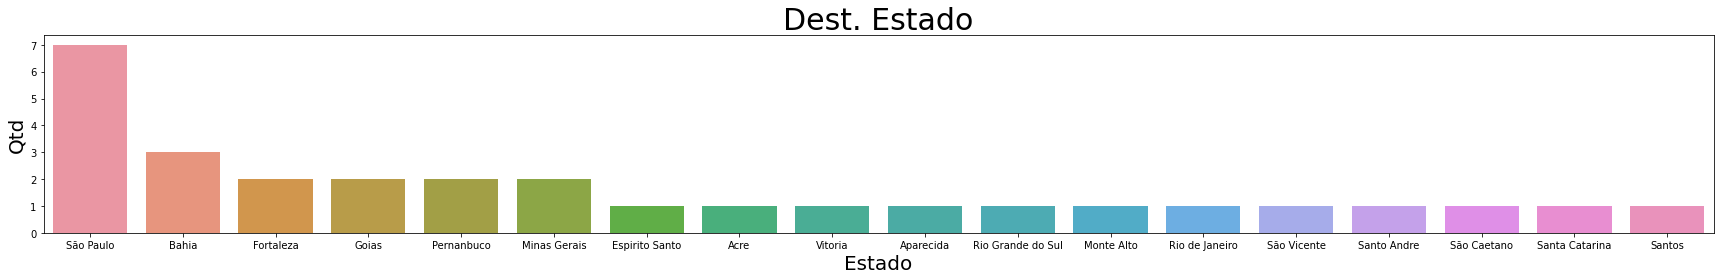

In [94]:
# Salvando dados do agrupamento da base por Estado em um frame
QtdEstado = Base.cidade.value_counts().to_frame().reset_index()
QtdEstado.columns = ['Estado', 'Qtd']

# Utilizando o frame para criar um gráfico
fig, ax = plt.subplots(figsize=(24,4))
sns.barplot(x=QtdEstado.Estado, y=QtdEstado['Qtd'], ax=ax, data=QtdEstado)
ax.set_xlabel('Estado', fontdict={'fontsize':20})
ax.set_ylabel('Qtd', fontdict={'fontsize':20})
ax.tick_params(labelsize=10)
ax.set_title("Dest. Estado", fontdict={'fontsize':30})
fig.tight_layout();